In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set(style='whitegrid')

# Load the cleaned dataset
try:
    df = pd.read_csv('cleaned_data.csv')
    print('The Data is loaded successfully')
except FileNotFoundError:
    raise FileNotFoundError('Error: cleaned_data.csv not found. Check the file path for it.')

The Data is loaded successfully


In [10]:
# Selecting and encoding features
features = df[['average_rating', 'rating_number', 'brand', 'main_category']].copy()

# Encoding categorical features 
features['brand_encoded'] = LabelEncoder().fit_transform(features['brand'].astype(str))
features['cat_encoded'] = LabelEncoder().fit_transform(features['main_category'].astype(str))


X = features[['average_rating', 'rating_number', 'brand_encoded', 'cat_encoded']]

In [11]:
# Scale features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Applying KMeans clustering 
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
features['cluster'] = kmeans.fit_predict(X_scaled)
df['cluster'] = features['cluster'] 

# Cluster summary
cluster_summary = features.groupby('cluster').agg(
    avg_rating=('average_rating', 'mean'),
    avg_reviews=('rating_number', 'mean'),
    avg_brand_id=('brand_encoded', 'mean'),
    avg_cat_id=('cat_encoded', 'mean'),
    count=('cluster', 'count')
).round(2)

print("\nCluster Summary:")
print(cluster_summary)



Cluster Summary:
         avg_rating  avg_reviews  avg_brand_id  avg_cat_id   count
cluster                                                           
0              4.26       418.87       6807.06        0.00  164262
1              3.00       109.06       9574.71        0.00   49408
2              3.66       160.58      21805.13        0.00  119919
3              4.52      8864.56      16141.35        0.00   13381
4              4.47       609.73      21443.76        0.04  125436


C:\Users\student\AppData\Local\Temp\ipykernel_1452\3688894935.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=features, x='cluster', palette='Set2')


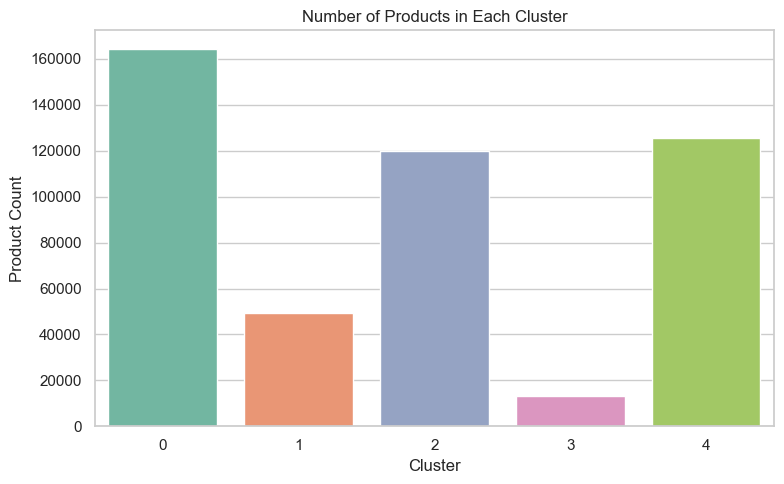

In [19]:
#Cluster Count Visualization
plt.figure(figsize=(8, 5))
sns.countplot(data=features, x='cluster', palette='Set2')
plt.title("Number of Products in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Count")
plt.tight_layout()
plt.show()

In [14]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
features['pca1'] = X_pca[:, 0]
features['pca2'] = X_pca[:, 1]

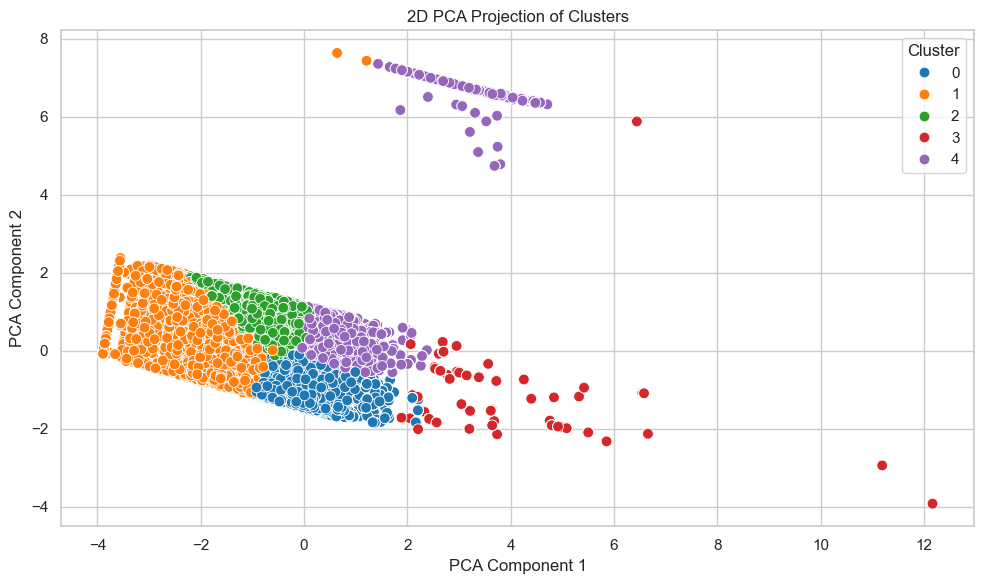

In [15]:
# Visualizing cluster counts with PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='pca1', y='pca2', hue='cluster', palette='tab10', s=60)
plt.title("2D PCA Projection of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

Applied K-Means clustering (k = 5) to segment products based on average rating, number of reviews, brand, and category. Each product was encoded using label encoding for brand and category and scaled using standard normalization.

**Cluster Interpretations:**
- **Cluster 0**: Comprises products with high ratings and a moderate number of reviews. Average brand and category IDs suggest mid-range popularity and niche domains.
- **Cluster 1**: Characterized by low average ratings and lower review counts. Often includes lesser-known brands or unpopular categories.
- **Cluster 2**: Features high review counts and above-average ratings, typically from well-known brands in dominant product categories.
- **Cluster 3**: Small cluster with mixed ratings but very low review numbers, possibly new or niche items.
- **Cluster 4**: Balanced average rating and review volume, representing a general consumer sentiment category.

The PCA plot shows distinct cluster separation, validating our segmentation approach.